C:\Users\fengxiang.mao\AppData\Local\Temp\ipykernel_25772\536426934.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


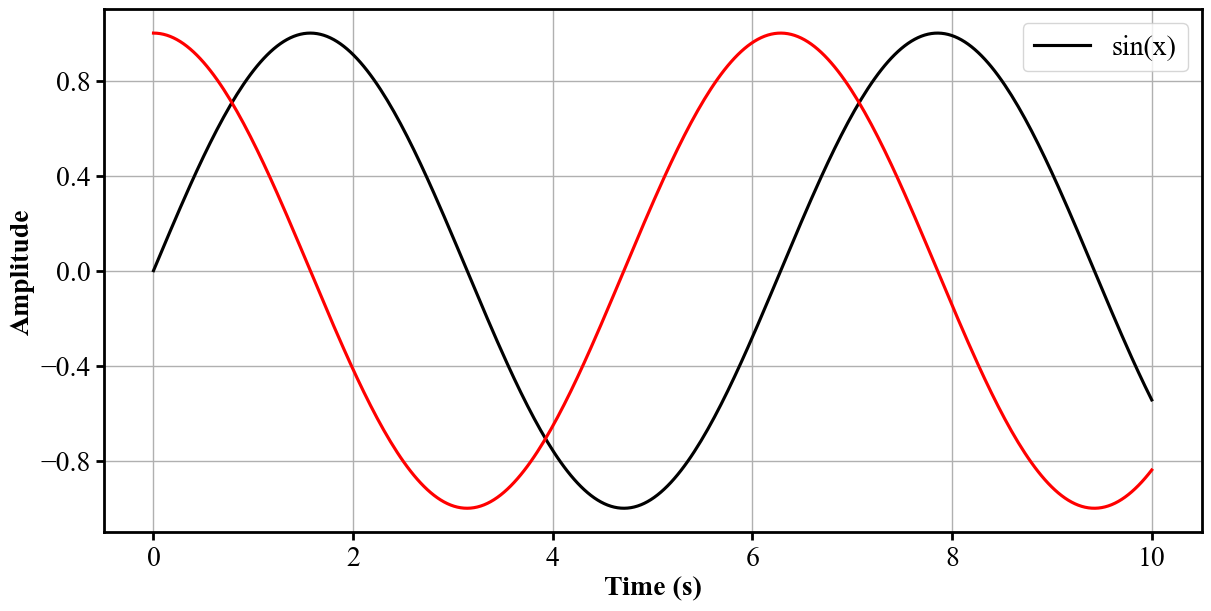

In [4]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from plot_style import *

x = np.linspace(0, 10, 300)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = make_standard_figure(figsize=( 12,6),grid=True, legend='auto')  # legend='auto'表示自动放置图例
ax.plot(x, y1, label='sin(x)')  # 线宽/颜色顺序已按规范
ax.plot(x, y2, label='cos(x)')

ax.set_xlabel('Time (s)')       # 标题已自动加粗、字号=20、Times New Roman
ax.set_ylabel('Amplitude')

# 已自动放右上角；若需要微调边框或透明度，可这样：
# fig, ax, place_legend = make_standard_figure(return_legend_placer=True)
# ...绘图后...
#place_legend(frameon=True)  # 例如需要图例带边框

fig.show()
save_figure(fig, 'my_plot.png', dpi=400, transparent=False)

In [5]:
from matplotlib import font_manager as fm

# 方式 A：名字是否可见
has_tnr = 'Times New Roman' in [f.name for f in fm.fontManager.ttflist]
print('Has Times New Roman?', has_tnr)

# 方式 B：拿到字体文件路径（若找不到会回退到其他字体）
path = fm.findfont('Times New Roman', fallback_to_default=False)
print('Path:', path)  # 如果抛错 / 找不到，就表示系统没有该字体


Has Times New Roman? True
Path: C:\Windows\Fonts\times.ttf


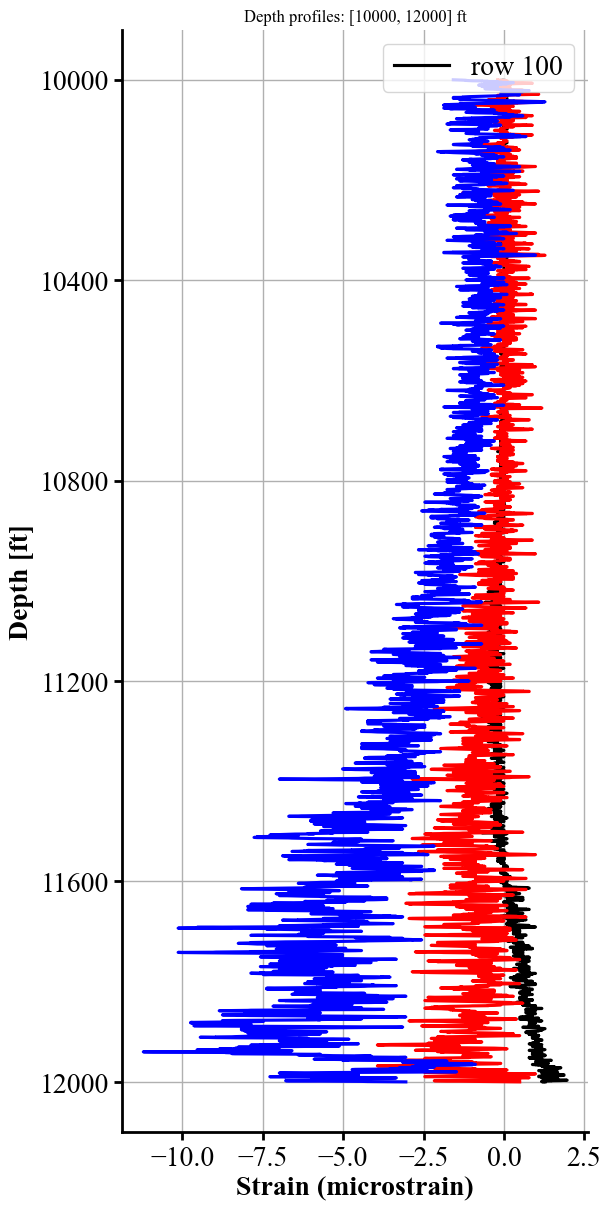

ValueError: not enough values to unpack (expected 2, got 1)

In [2]:
%reload_ext autoreload
%autoreload 2


import h5py
from plot_style_new import make_standard_figure, plot_depth_profiles_in_window, decode_stamps_to_datetimeindex

f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')
dstrain = (f1['data'])
depth = (f1['depth'])
date_plot = (f1['stamps'])

# （可选）把 stamps 转为 DatetimeIndex，便于时间戳就近匹配
stamps_idx = decode_stamps_to_datetimeindex(date_plot, fmt='%m/%d/%Y %H:%M:%S.%f') if date_plot is not None else None

# 1) 用“行号”选多个时刻
fig, ax = plot_depth_profiles_in_window(
    dstrain, depth,
    depth_min=10000, depth_max=12000,
    times=[100, 500, 1500],                # 多个时刻（行号）
    stamps_index=None,                      # 行号选时刻时不用传
    depth_unit="ft", strain_unit="(microstrain)",
    grid=True, legend='auto'                # 继承了 make_standard_figure 的风格与图例逻辑
)

# 2) 用“时间戳”选多个时刻（需要 stamps_index）
fig, ax = plot_depth_profiles_in_window(
    depth,dstrain, 
    depth_min=8000, depth_max=9000,
    times=["2022-03-14 20:59:38", "2022-03-14 21:10:00"],   # 多个时刻（时间字符串）
    stamps_index=stamps_idx,                                 # 传入时间索引以最近匹配
    depth_unit="ft", strain_unit="(microstrain)",
    grid=True, legend='auto'
)
